<a href="https://colab.research.google.com/github/Kamarul891212/STQD6014_Data_Science_P132829/blob/main/Olympic_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Explanatory Data Analysis of Olympic Games**

# **Introduction**

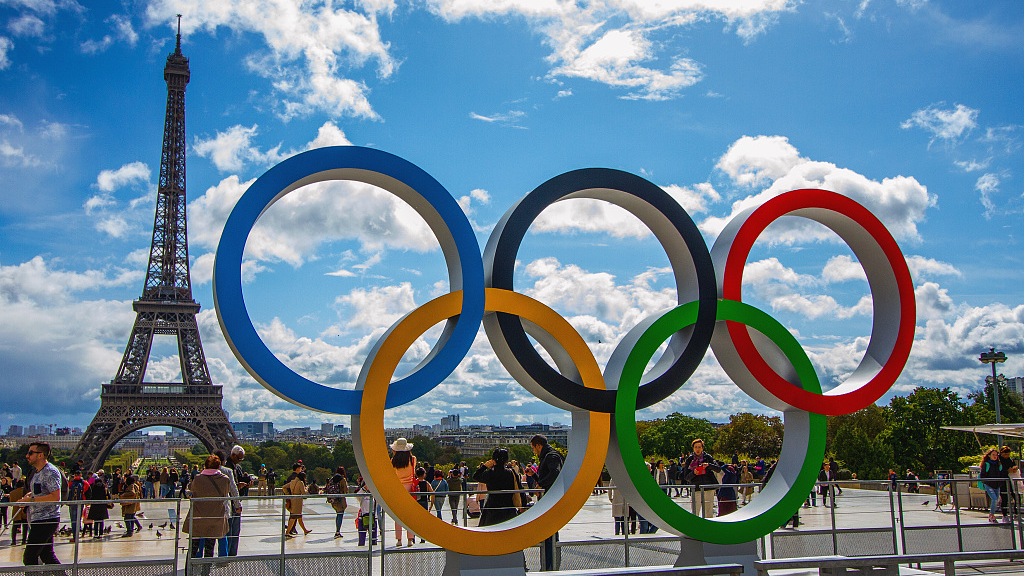

The Olympic Games are a prestigious international sporting event that takes place every four years, bringing together athletes from around the world to compete in various sports. The modern Olympic Games have their origins in ancient Greece, where athletic competitions were held in Olympia as early as 776 BCE.

The modern Olympic Games were revived in the late 19th century by Pierre de Coubertin, a French educator and sports enthusiast. The inaugural modern Olympics were held in Athens in 1896, featuring athletes from 14 nations. Since then, the Olympic Games have grown in size and significance, becoming one of the most-watched and celebrated events globally.

Key features of the Olympic Games include the Olympic torch relay, where the Olympic flame is carried from the site of the ancient Olympics in Olympia, Greece, to the host city, symbolizing the continuity between the ancient and modern Games. The opening ceremony marks the beginning of the Games, featuring artistic performances, the parade of nations, and the lighting of the Olympic cauldron.

The Summer and Winter Olympics are the two main editions of the Games, alternating every two years. The Summer Olympics feature a diverse range of sports such as athletics, swimming, gymnastics, and soccer, while the Winter Olympics focus on winter sports like skiing, ice hockey, and figure skating.

The International Olympic Committee (IOC) is the governing body responsible for organizing and overseeing the Olympic Games. The Games aim to promote international understanding, friendship, and cooperation through sport, and they have become a symbol of unity and peace across the globe. Athletes who participate in the Olympics represent their respective countries, competing at the highest level to achieve personal and national excellence.

## **About the dataset**

This dataset can be downloaded from kaggle with url http://tinyurl.com/3v29d4fx.

The feature description of the variables are as below:

| Feature      | Description                                    |
|--------------|------------------------------------------------|
| year         | The year of the Olympic Games                  |
| games_type   | Type of Games (summer/winter)                  |
| host_country | The name of the country that hosted the Games  |
| host_city    | The name of the city where the Games were held |
| athletes     | The number of athletes who participated in the Games |
| teams        | The number of teams who participated in the Games |
| competitions | The number of competitions held during the Games |
| country      | The name of the country that participated in the Games |
| gold         | The number of gold medals won by the country |
| silver       | The number of silver medals won by the country |
| bronze       | The number of bronze medals won by the country |


In [3]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

### **Data Exploratory**

In [ ]:
# Download the olympic_games.csv file here: http://tinyurl.com/3v29d4fx
# Upload olympic_games.csv to Google Drive
from google.colab import files
files.upload()

In [6]:
!pwd

/content


In [9]:
df = pd.read_table('/content/olympic_games.csv', sep = ',')
print(df.head())

   year games_type host_country host_city  athletes  teams  competitions  \
0  2022     Winter        China   Beijing      2834     91           109   
1  2022     Winter        China   Beijing      2834     91           109   
2  2022     Winter        China   Beijing      2834     91           109   
3  2022     Winter        China   Beijing      2834     91           109   
4  2022     Winter        China   Beijing      2834     91           109   

     country  gold  silver  bronze  
0  Australia     1       2       1  
1    Austria     7       7       4  
2    Belarus     0       2       0  
3    Belgium     1       0       1  
4     Canada     4       8      14  


# **Problem Statement**

# **Results and Discussion**

# **Conclusion**